In [1]:
import ipywidgets as widgets
from ipywidgets import VBox, HTML, HBox, IntSlider, FloatSlider, Button, Label
from IPython.display import display, Image, clear_output
import numpy as np

In [2]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter serverextension enable voila --sys-prefix

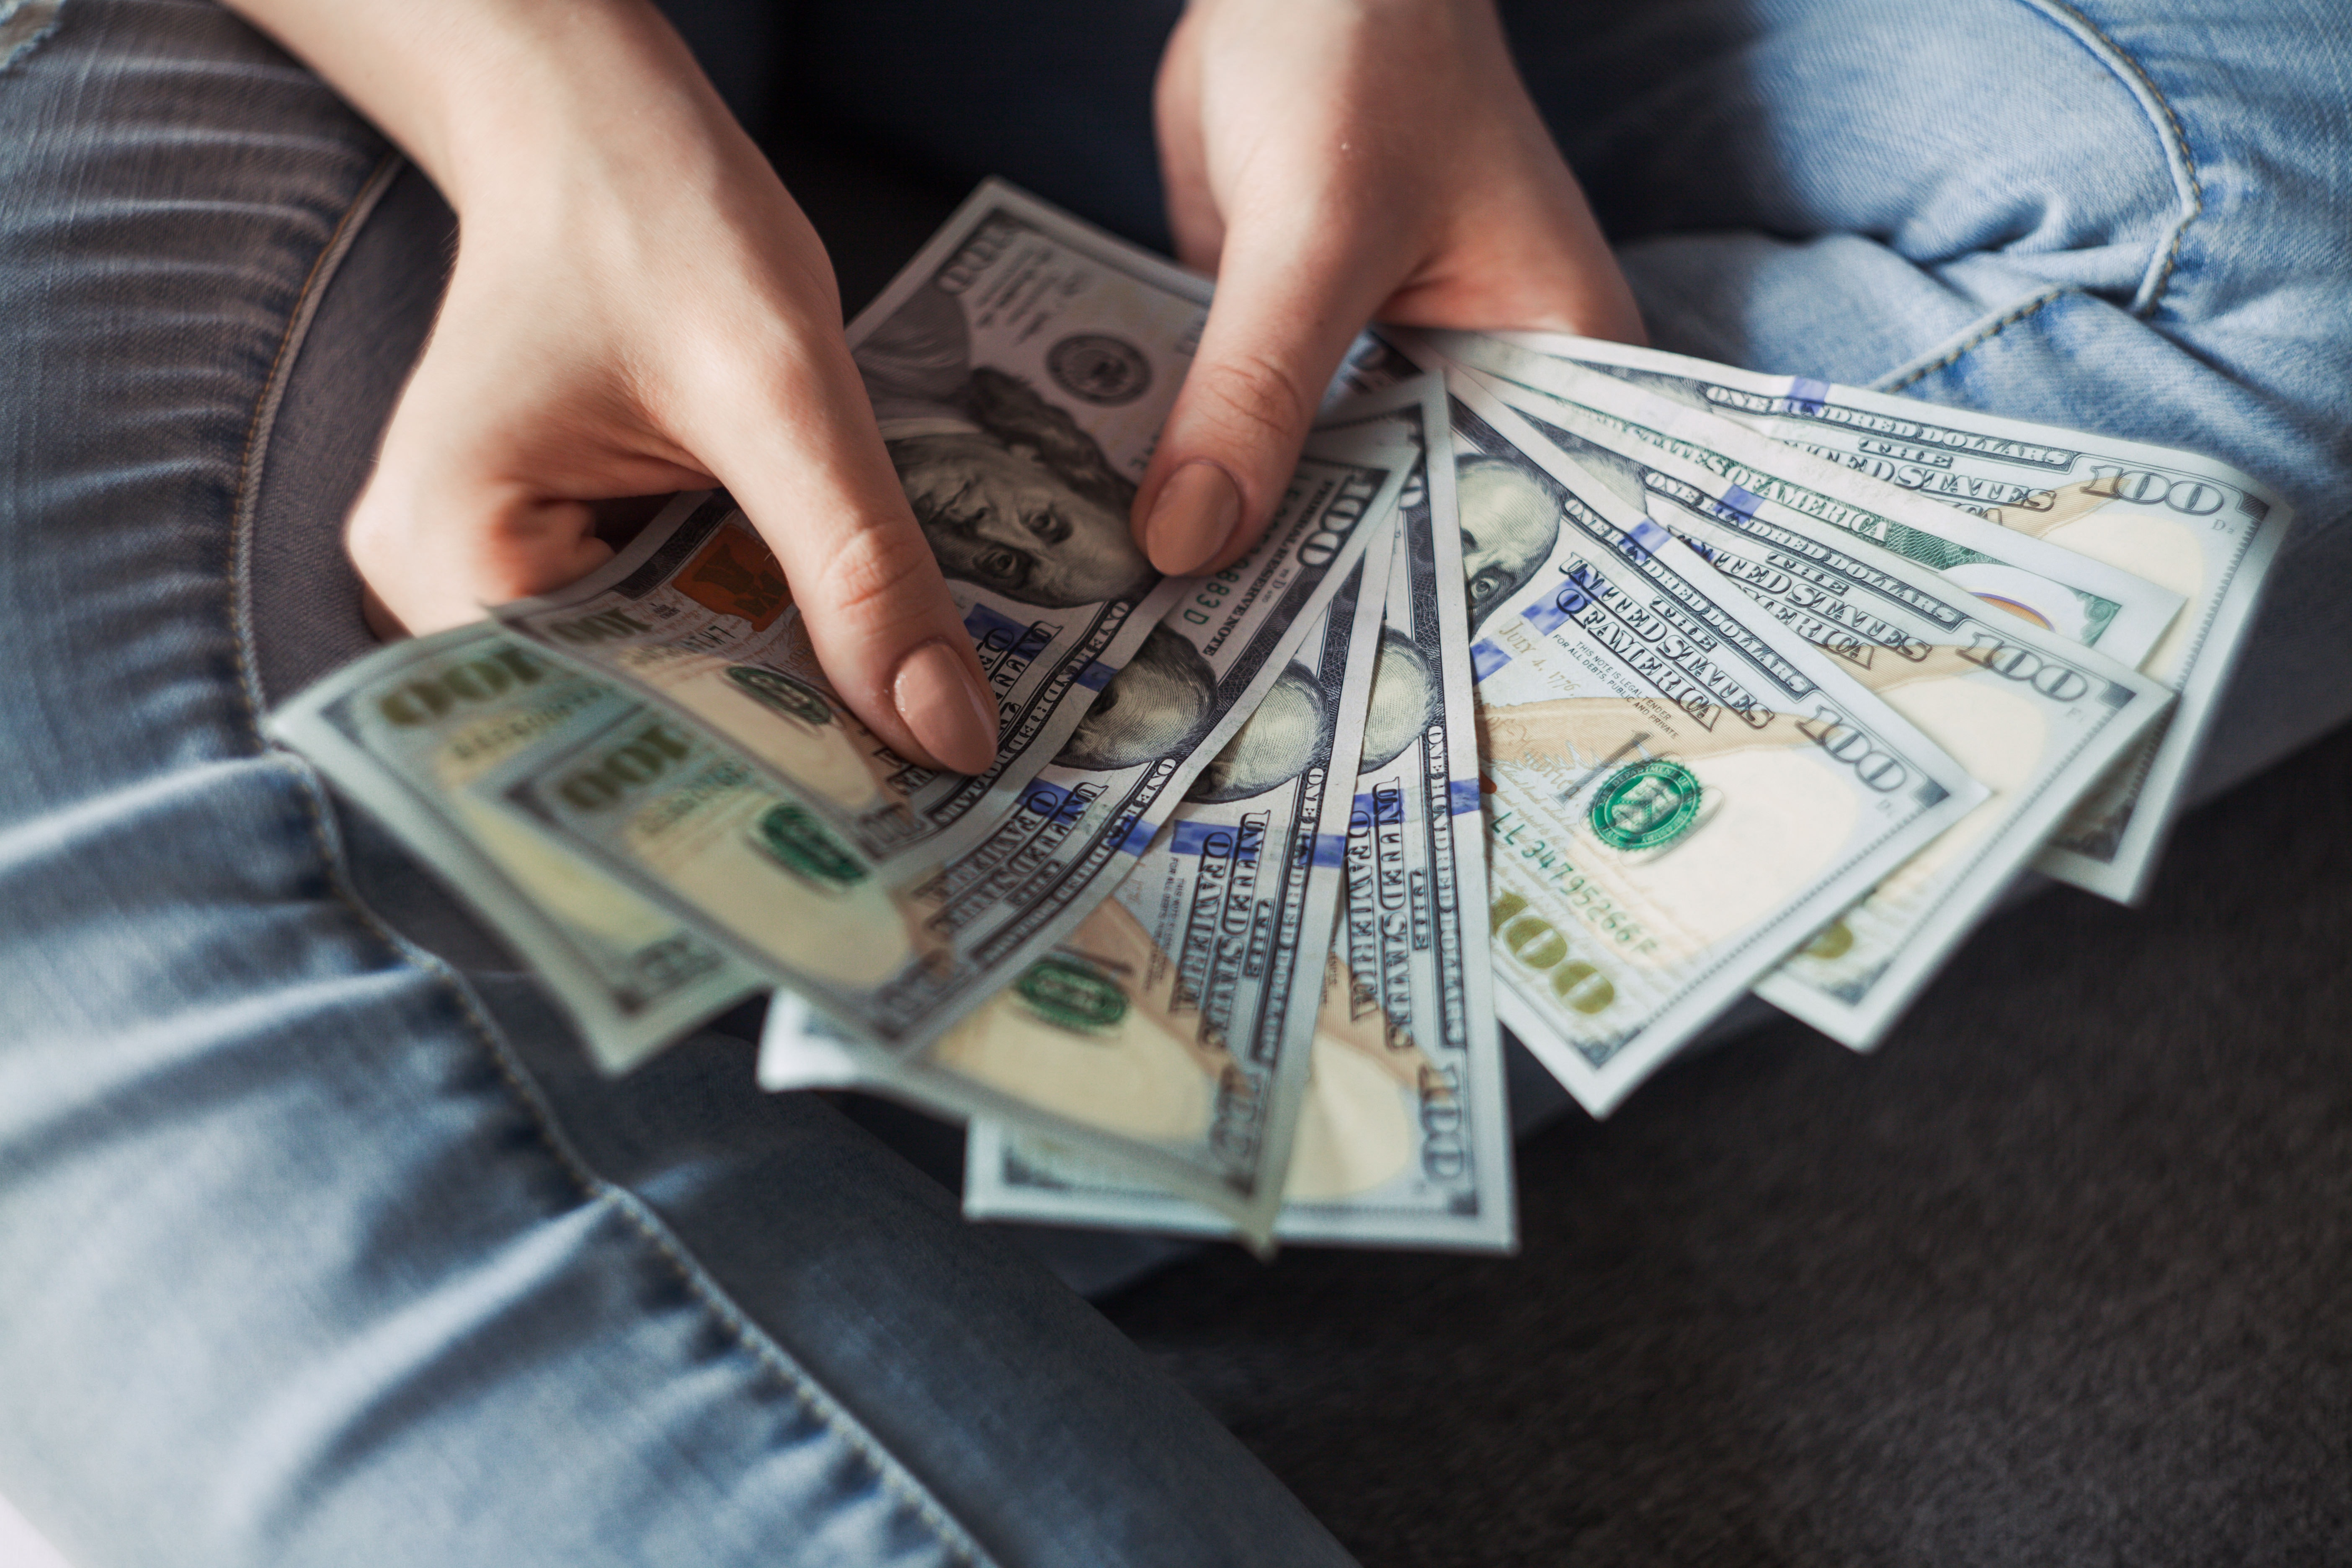

In [3]:
def calculate_loan(borrowed_capital, interest_rate, pay_off_period):
    monthly_rate = interest_rate / 12
    num_payments = pay_off_period * 12
    monthly_payment = borrowed_capital * (monthly_rate * (1 + monthly_rate)**num_payments) / ((1 + monthly_rate)**num_payments - 1)
    
    total_amount_paid = monthly_payment * num_payments
    
    return (f"{monthly_payment:.2f}, Total amount paid: £{total_amount_paid:.2f}")
   
def loan_calculator():  
    borrowed_capital = IntSlider(min=1000, max=100000, step=1000, value=10000, description='Loan Amount:')
    interest_rate = FloatSlider(value=0.05, min=0.01, max=0.9, step=0.01, description='Interest Rate:',orientation='horizontal',readout=True)
    pay_off_period = IntSlider(value=5, min=1, max=30, step=1, description='Pay-off Period (years):', orientation='horizontal')
    calculate_button = Button(description='Calculate', layout=dict(width='120px'))
    monthly_payment_output = Label(value='', layout=dict(width='450px'))
    
    def on_calculate_click(change):
        clear_output()
        
        monthly_payment = calculate_loan(borrowed_capital.value, interest_rate.value, pay_off_period.value)
        monthly_payment_output.value = f"Monthly Payment: £{monthly_payment} "
    
    calculate_button.on_click(on_calculate_click)
        
    widgets = VBox([
        HTML(value="<h1 style='font-size:30px; text-align:center; font-weight:bold'>Loan Calculator</h1>"),
        HBox([borrowed_capital, interest_rate, pay_off_period]),
        HBox([calculate_button, monthly_payment_output])
    ])
    
    Image(filename='money.jpg', width=200)
    
    display(widgets,Image(filename='money.jpg', width=400))
    

loan_calculator()

In [4]:
!pip freeze > requirements.txt